In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import cv2

from sklearn.cluster import KMeans

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
no_of_color = 24


In [30]:
im = cv2.imread('./test1.png')

In [31]:
# assert type(im) is not type(im)
print type(im)
im = cv2.cvtColor(im , cv2.COLOR_RGB2BGR)

<type 'numpy.ndarray'>


In [32]:
# cv2.imshow('im' , im)
# above will not work in jupyter notebook

In [33]:
# im = im[:,:,-1]

In [34]:
#since image smaller than 720p converting to 480p i.e. 640,480 in dimension

In [35]:
print im.shape

(1600, 2560, 3)


In [36]:
y = im.shape[0]
x = im.shape[1]
print x , y
x = int(x*480/float(y))
y = 480
print x , y

2560 1600
768 480


In [37]:
# to make y = 480 , so we divide x by y and multiply by 480

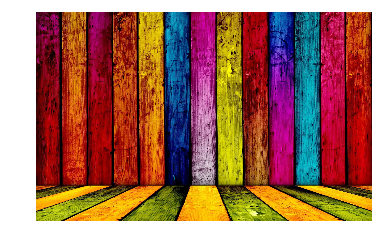

In [38]:
plt.figure(0)
plt.imshow(im)
plt.axis('off')
plt.show()

In [39]:
# imgdash = cv2.resize(im,(413,531))

In [40]:
# change to y=480
img = cv2.resize(im , (x,y))


#chnage to 480p
# img = cv2.resize(im , (640,480))
#change to passport size
# img = cv2.resize(im,(413,531))
#original 
# img = im

In [41]:
print im.shape
print img.shape

(1600, 2560, 3)
(480, 768, 3)


In [42]:
img_vec = img.reshape((img.shape[0]*img.shape[1] , img.shape[2]))
print img_vec.shape

(368640, 3)


In [43]:
km = KMeans(n_clusters=no_of_color ,  max_iter=500)
km.fit(img_vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=24, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

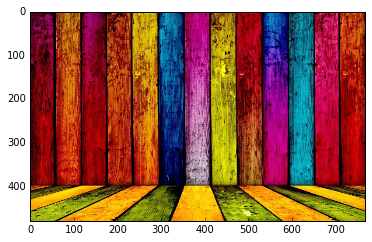

In [44]:
plt.figure(10)
plt.imshow(img)
plt.show()

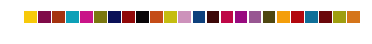

In [45]:
colors = 255  - km.cluster_centers_.astype("uint8")
# print colors[1]
# f = np.zeros((20, 20, 3))
# print f.shape
# f[:,:,:] = colors[1]
# print f
plt.figure(0)
for cols in range(colors.shape[0]):
    cl = np.zeros((20, 20, 3)) 
#     box of 20,20 will be shown
    cl[:, :, :] = colors[cols]
#     print cl
    plt.subplot(1, no_of_color, cols+1)
    plt.axis("off")
    plt.imshow(cl)
plt.show()

In [46]:
# plt.figure(10)
# plt.imshow(new_im)
# plt.axis('off')
# plt.savefig('./adsf.png')

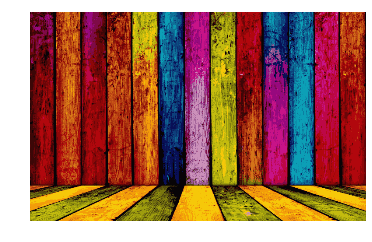

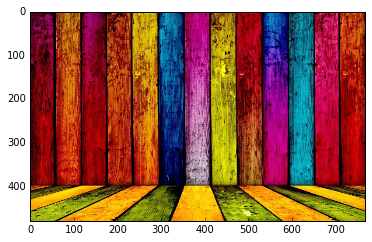

True

In [47]:
new_im = np.zeros((img_vec.shape))

for ix in range(new_im.shape[0]):
    new_im[ix, :] = colors[km.labels_[ix]]

new_im = new_im.reshape(img.shape)

plt.figure(0)
plt.axis("off")
new_im = 255 - new_im.astype('uint8')
plt.imshow(new_im)
plt.show()
new_im = cv2.cvtColor(new_im , cv2.COLOR_BGR2RGB)
# new_im = cv2.resize(new_im,(640,480))
cv2.imwrite('compress.png' , new_im)

# new_im = cv2.cvtColor(new_im , cv2.COLOR_BGR2RGB)
# cv2.imwrite('compress.jpeg' , new_im)
# plt.savefig('./adsf.png')

plt.figure(1)
# im_480 = cv2.resize(im, (640,480))
im_480 = cv2.resize(im,(x,y))
plt.imshow(im_480)
plt.show()
im_480 = cv2.cvtColor(im_480 , cv2.COLOR_BGR2RGB)
cv2.imwrite('test1_480.png' , im_480)

In [48]:
def calc_loss(originalpath , compressedpath) :
    oimg = cv2.imread(originalpath)
    cimg = cv2.imread(compressedpath)
    print 'Original Image Shape ',oimg.shape
    print 'Compressed Image Shape ',cimg.shape
    
    loss = 0
    
    for px in range(oimg.shape[0]) :
        for py in range(oimg.shape[1]) :
            l =0
            for c in range(3) :
                l += (cimg[px,py,c] - oimg[px,py,c])
            loss += l/3
    print oimg.shape[0]*oimg.shape[1]
    loss = (loss*100)/float(oimg.shape[0]*oimg.shape[1]*255)
    return loss

In [49]:
calc_loss('./test1_480.png' , './compress.png')

Original Image Shape  (480, 768, 3)
Compressed Image Shape  (480, 768, 3)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in ubyte_scalars


368640


43.583779062840414